In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [28]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [29]:
len(X_train), len(X_test)

(60000, 10000)

In [30]:
X_train[0] # gives the matrix of the first image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

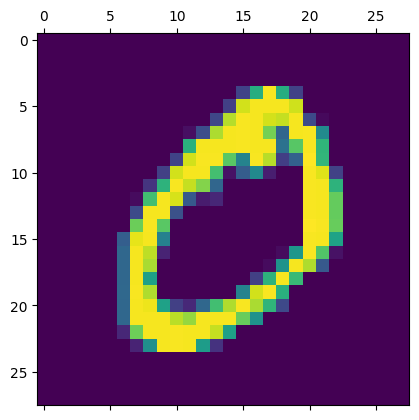

In [31]:
plt.matshow(X_train[1]) 

In [32]:
y_train[0] # gives the number of the first image

5

In [33]:
# divide the values of the dataset by the number of pixels to get the values between 0 and 1 to increase accuracy
X_train = X_train / 255
X_test = X_test / 255

In [34]:
# flatten the image matrix
X_train_flattened = X_train.reshape(len(X_train), 28*28)
print(X_train_flattened.shape)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [35]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
# 10 is the number of output neurons
# input_shape is the shape of the input matrix
# activation is the activation function

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8107 - loss: 0.7269
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9132 - loss: 0.3087
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9228 - loss: 0.2808
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9229 - loss: 0.2757
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9259 - loss: 0.2638


In [36]:
# evaluate the model on the test dataset
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9148 - loss: 0.3010


[0.26585474610328674, 0.9254999756813049]

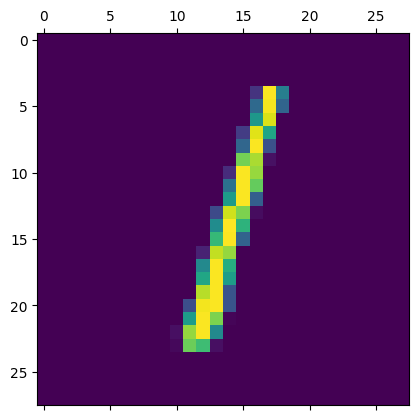

In [37]:
indexValue = 2
plt.matshow(X_test[indexValue])

In [38]:
y_predicted = model.predict(X_test_flattened)
y_predicted[indexValue]
# store the predictions in an array

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([4.84161690e-04, 9.92857277e-01, 6.65969968e-01, 3.18644047e-01,
       2.30188109e-02, 1.10658064e-01, 1.93845227e-01, 1.49446622e-01,
       4.56652105e-01, 5.68498895e-02], dtype=float32)

In [39]:
np.argmax(y_predicted[indexValue])

1

In [40]:
# Confusion matrix - to see how the prediction looks like
y_predicted_labels = [np.argmax(i) for i in y_predicted]
# convert the predictions to usable labels

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   5,    8,  926,   18,    9,    5,   11,   10,   37,    3],
       [   4,    0,   19,  919,    0,   26,    2,   11,   21,    8],
       [   1,    1,    2,    2,  911,    0,   13,    5,    9,   38],
       [  10,    2,    3,   31,   10,  776,   16,    8,   31,    5],
       [  11,    3,    7,    1,    8,   13,  911,    2,    2,    0],
       [   1,    6,   24,    8,    8,    0,    0,  948,    2,   31],
       [   6,    7,    8,   21,    9,   26,    8,   11,  871,    7],
       [  11,    6,    1,   10,   25,    7,    0,   23,    8,  918]])>

Text(95.72222222222221, 0.5, 'Truth')

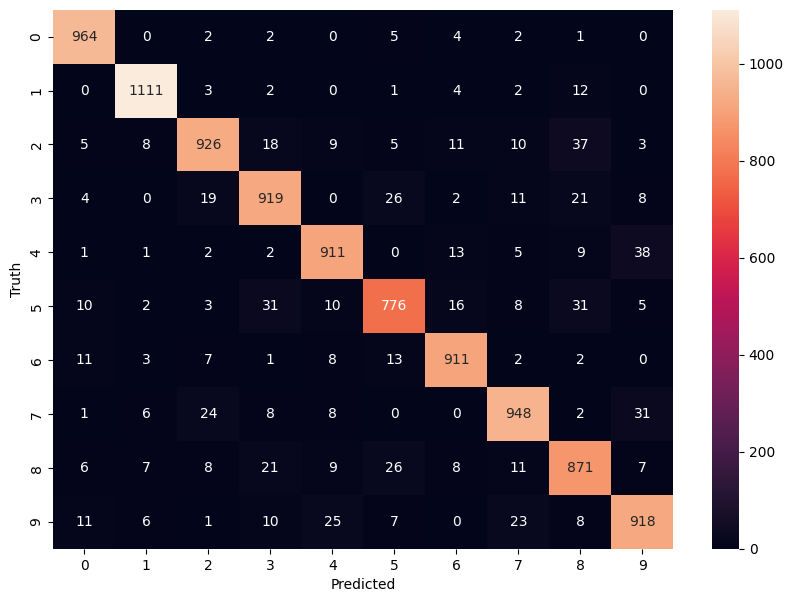

In [41]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
# Add hidden layers
model = keras.Sequential([
    keras.layers.Dense(300, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8937 - loss: 0.3675
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9713 - loss: 0.0958
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9810 - loss: 0.0614
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9880 - loss: 0.0395
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9922 - loss: 0.0275


In [43]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.0853


[0.07339892536401749, 0.9778000116348267]

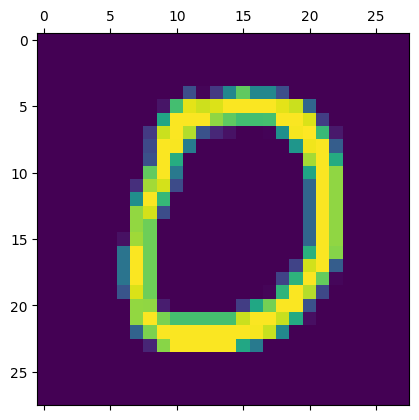

In [44]:
indexValue = 10
plt.matshow(X_test[indexValue])

In [45]:
y_predicted = model.predict(X_test_flattened)
y_predicted[indexValue]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([9.9999917e-01, 1.4938746e-04, 2.3767050e-01, 1.8886613e-03,
       4.3620503e-08, 2.3502705e-01, 1.1468069e-02, 3.0284238e-01,
       7.0552228e-06, 7.9648927e-02], dtype=float32)

In [46]:
np.argmax(y_predicted[indexValue])

0

In [47]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    3,    0,    2,    1,    2,    1,    1,    0],
       [   0, 1127,    3,    1,    0,    1,    1,    0,    2,    0],
       [   2,    1, 1017,    1,    0,    0,    1,    6,    4,    0],
       [   1,    1,   10,  982,    0,    4,    0,    4,    6,    2],
       [   0,    1,    5,    0,  972,    0,    2,    0,    0,    2],
       [   2,    0,    0,    4,    1,  880,    2,    1,    2,    0],
       [   4,    4,    2,    1,    4,   15,  925,    0,    3,    0],
       [   1,    6,   11,    2,    2,    0,    0,  999,    1,    6],
       [   1,    1,    5,    2,    5,    8,    0,    5,  944,    3],
       [   4,    4,    0,    3,   14,   10,    0,    9,    2,  963]])>

Text(95.72222222222221, 0.5, 'Truth')

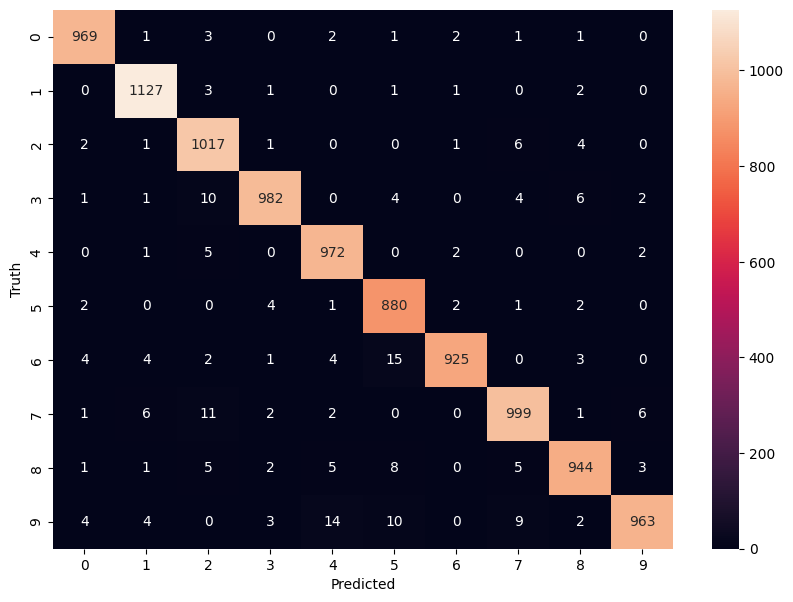

In [48]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
# alternative to flattend array
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1000, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, input_shape=(784,), activation='elu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=3)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9089 - loss: 0.2997
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9762 - loss: 0.0761
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9842 - loss: 0.0481


In [50]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9753 - loss: 0.0773


[0.06934715062379837, 0.9781000018119812]